# Tanner Kerby Capstone Project

# Breast Cancer Tumor Classification

##### Importing neccessarry libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Displaying the data

In [3]:
url = "https://raw.githubusercontent.com/tannerkerby/Capstone/refs/heads/main/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(url) #reading the raw CSV data
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,benign,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0000,0.0000
1,benign,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0000,0.0000
2,benign,7.760,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.0000
3,benign,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0000,0.0000
4,benign,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
564,malignant,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.4264,0.1823
565,malignant,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.3339,0.1845
566,malignant,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.2871,0.1878
567,malignant,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.3368,0.1913


## Descriptive Methods & Visualizations

#### The radius mean is the average distance from the center of a cell nucleus to its perimeter. This measure can provide insights into the size and shape of the nuclei, which are important characteristics in distinguishing between malignant (cancerous) and benign (non-cancerous) cells. Below is a histogram showing the mean radius sizes and the diagnosis of the cell.

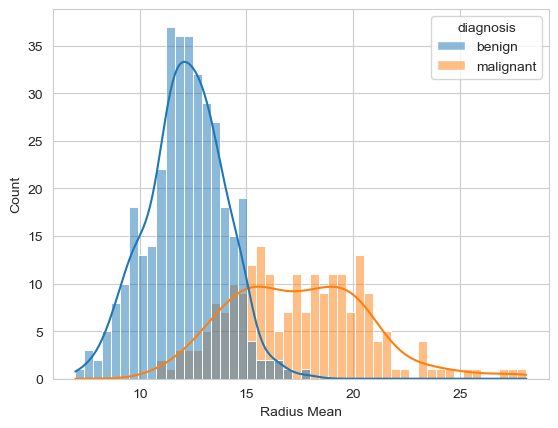

In [40]:
histplot = sns.histplot(df,x='radius_mean', hue='diagnosis', kde=True, bins =50)
histplot.set_xlabel("Radius Mean")
plt.show()

#### Below are two categorical plots that display the benign and malignant tumors compared with the mean perimeter size of the cancer cell. The second plot is a box plot to provide two viewpoints of the data.

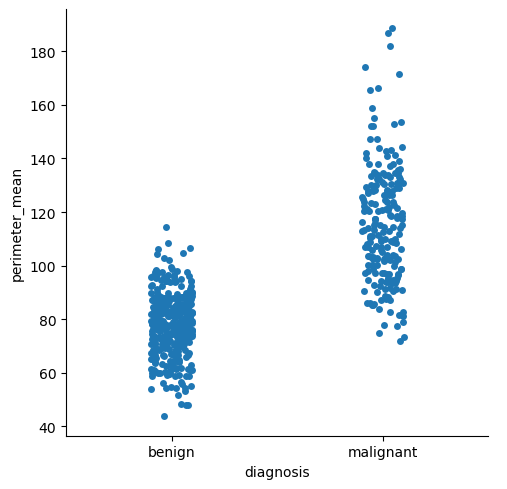

In [9]:
sns.catplot(data=df, x="diagnosis", y="perimeter_mean")
plt.show()

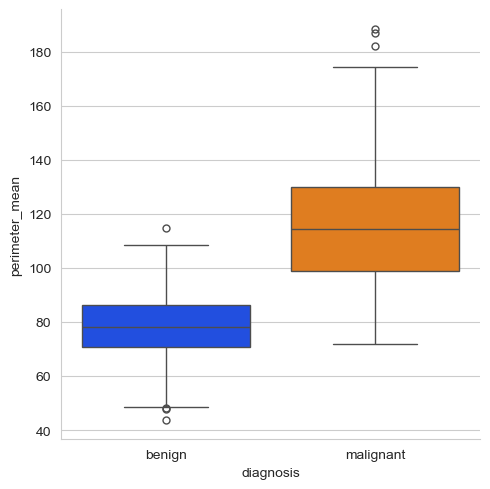

In [35]:
sns.catplot(data=df, x="diagnosis", y="perimeter_mean", kind="box", hue = "diagnosis", palette="bright")
plt.show()

#### The number of concave points can provide insight into the shape and irregularity of the tumor. Tumors with more concave points may be more irregular in shape, which can sometimes be associated with malignancy. In contrast, a smoother, more rounded contour might suggest a benign tumor.

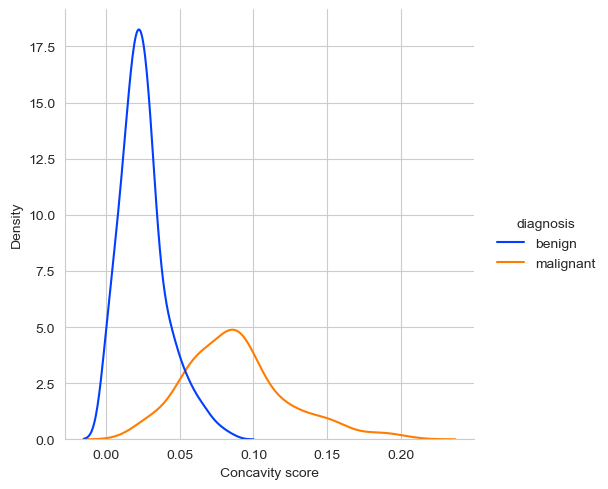

In [13]:
sns.set_style("whitegrid")
concaveplot = sns.displot(df, x="concave points_mean", hue="diagnosis", kind="kde", palette="bright")
concaveplot.set_axis_labels("Concavity score")
plt.show()

## Machine Learning Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import model_selection

#### Initializing a logistic regression model

In [138]:
mylog_model = linear_model.LogisticRegression(max_iter=1000)

In [9]:
y = df.values[:, 0] #This is the diagnosis [benign] or [malignant]
x = df.values[:, 1:9] #The rest of the dataset.

### Basic Data Prediction

#### Fitting the model with our x and y values. Y = diagnosis true value

In [144]:
mylog_model.fit(x, y)

LogisticRegression(max_iter=1000)

#### Creating a y_prediction variable based on the prediction of the x values. We will then generate an accuracy score, which is around 91%

In [146]:
y_prediction = mylog_model.predict(x)
print("Accuracy Score:", metrics.accuracy_score(y, y_prediction))

Accuracy Score: 0.9138840070298769


### Improving the model using a train_test_split function

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=36)

##### Here, I am creating a new logistic regression model using the test and training variables.

In [13]:
mynewlog_model = linear_model.LogisticRegression(max_iter=1000)
mynewlog_model.fit(x_train, y_train)
new_y_prediction = mynewlog_model.predict(x_test)
print(metrics.accuracy_score(y_test, new_y_prediction))

0.8947368421052632


#### Below is a confusion matrix to display the predicted and true diagnosis of the tumor data based on the new logistic regression model

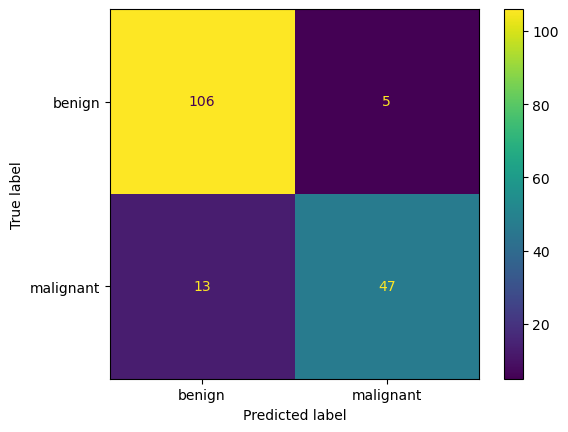

In [15]:
disp = ConfusionMatrixDisplay.from_estimator(mynewlog_model, x_test, y_test)
disp.ax_.grid(False)
plt.show()

## UI Interface

##### Take measuremeants based off of a breast tumor's cells and input those measurements to recieve a prediction of whether or not the tumor is cancerous. The accuracy score is about 90%

In [17]:
import ipywidgets as widgets

In [19]:
#The sliders where the user can input values. Min and max are set by using the complete datasets' 
radius_widget = widgets.FloatSlider(description='Radius:',min=2, max=25)
texture_widget = widgets.FloatSlider(description='Texture:', min=10, max=30)
perimeter_widget = widgets.FloatSlider(description='Perimeter:', min=30, max=200)
area_widget = widgets.FloatSlider(description='Area:', min=100, max=2000)
smoothness_widget = widgets.FloatSlider(description='Smoothness:', min=0.05, max=0.17)
compactness_widget = widgets.FloatSlider(description='Compactness:', min=0.06, max=0.3)
concavity_widget = widgets.FloatSlider(description='Concavity:', min=0.0, max=0.5)
concavepoints_widget = widgets.FloatSlider(description='Con Points:', min=0.0, max=.22)

#A button for the user to get predictions using input valus. 
button_predict = widgets.Button( description='Predict' )
button_output = widgets.Label(value='Enter values and press the \"Predict\" button.' )

#Defines what happens when you click the button 
def on_click_predict(b):
    predicition = mynewlog_model.predict([[
        radius_widget.value, texture_widget.value, perimeter_widget.value, area_widget.value, smoothness_widget.value, compactness_widget.value, concavity_widget.value, concavepoints_widget.value]])
    button_output.value='Prediction = ' + str(predicition[0])
button_predict.on_click(on_click_predict)

#Displays the text boxes and button inside a VBox 
vb=widgets.VBox([radius_widget, texture_widget, perimeter_widget, area_widget, smoothness_widget, compactness_widget, concavity_widget, concavepoints_widget, button_predict,button_output])
print('\033[1m' + 'Enter tumor cell values to make a prediction:' + '\033[0m')
display(vb)

Enter tumor cell values to make a prediction:
